 # 1.Importer les packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

# 2. Lecture du fichier

In [2]:
data = pd.read_csv('darknet.csv')

# 3. Analyse des données

In [3]:
data.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:25,60320002,5,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,Non-Tor,Chat
1,32872,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:25,100709850,6,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,Non-Tor,Chat
2,32873,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:15,116498878,12,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,Non-Tor,Chat
3,32874,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:15,93296196,6,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,Non-Tor,Chat
4,32875,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:17,91832679,14,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,Non-Tor,Chat


In [4]:
data.shape

(22576, 86)

In [5]:
data.isnull().sum()

Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Label.1       0
Length: 86, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  22576 non-null  int64  
 1   Flow ID                     22576 non-null  object 
 2   Src IP                      22576 non-null  object 
 3   Src Port                    22576 non-null  int64  
 4   Dst IP                      22576 non-null  object 
 5   Dst Port                    22576 non-null  int64  
 6   Protocol                    22576 non-null  int64  
 7   Timestamp                   22576 non-null  object 
 8   Flow Duration               22576 non-null  int64  
 9   Total Fwd Packet            22576 non-null  int64  
 10  Total Bwd packets           22576 non-null  int64  
 11  Total Length of Fwd Packet  22576 non-null  int64  
 12  Total Length of Bwd Packet  22576 non-null  int64  
 13  Fwd Packet Length Max       225

# 4. Prétraitement des données

In [7]:
list_object = ['Flow ID','Src IP', 'Dst IP', 'Timestamp','Label']
label_encoder = LabelEncoder()
for type in list_object:
    data[type] = label_encoder.fit_transform(data[type])

In [8]:
data['Label.1'] = label_encoder.fit_transform(data['Label.1'])

In [9]:
data.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,14445,563,5222,4,56297,6,472,60320002,5,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,0,0
1,32872,14758,709,0,1458,0,0,472,100709850,6,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,0,0
2,32873,14445,563,5222,4,56297,6,465,116498878,12,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,0,0
3,32874,14758,709,0,1458,0,0,465,93296196,6,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,0,0
4,32875,14445,563,5222,4,56297,6,466,91832679,14,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,0,0


In [10]:
data = data.rename(columns={'Label.1': 'Label_1'})

In [11]:
data.corr().Label_1.sort_values(ascending =False)

Label_1                1.000000
Fwd Seg Size Min       0.501025
FIN Flag Count         0.462511
Timestamp              0.439414
SYN Flag Count         0.388997
                         ...   
Subflow Bwd Packets         NaN
Active Mean                 NaN
Active Std                  NaN
Active Max                  NaN
Active Min                  NaN
Name: Label_1, Length: 86, dtype: float64

In [12]:
data['Subflow Bwd Packets'].value_counts()

Subflow Bwd Packets
0    22576
Name: count, dtype: int64

In [13]:
data = data.drop(columns=['Subflow Bwd Packets', 'Active Mean','Active Std','Active Max','Active Min'])
data.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_1
0,32871,14445,563,5222,4,56297,6,472,60320002,5,...,4547,4547,2,20,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,0,0
1,32872,14758,709,0,1458,0,0,472,100709850,6,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,0,0
2,32873,14445,563,5222,4,56297,6,465,116498878,12,...,2640,4547,7,20,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,0,0
3,32874,14758,709,0,1458,0,0,465,93296196,6,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,0,0
4,32875,14445,563,5222,4,56297,6,466,91832679,14,...,2640,4547,8,20,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,0,0


In [14]:
data['Label_1'].value_counts()

Label_1
0    11478
1    11098
Name: count, dtype: int64

In [15]:
data.shape

(22576, 81)

# 5. Division des données

In [16]:
X = data.iloc [:, :-1]
y= data.iloc[:, -1]

In [17]:
print(X.shape)
print(y.shape)

(22576, 80)
(22576,)


In [18]:
X = np.where(np.isinf(X), np.nan, X) 

In [19]:
print(np.isnan(X).sum())  # Vérifie s'il y a des NaN

28


In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

In [21]:
print(np.isnan(X).sum())  # Vérifie s'il y a des NaN

0


In [22]:
print("Max:", X.max())
print("Min:", X.min())

Max: 1456420000000000.0
Min: -213.0


In [23]:
X = np.clip(X, -1e10, 1e10)  # Remplace les valeurs extrêmes

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=8)

In [25]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (13545, 80)
y_train: (13545,)
X_test: (9031, 80)
y_test: (9031,)


<Axes: >

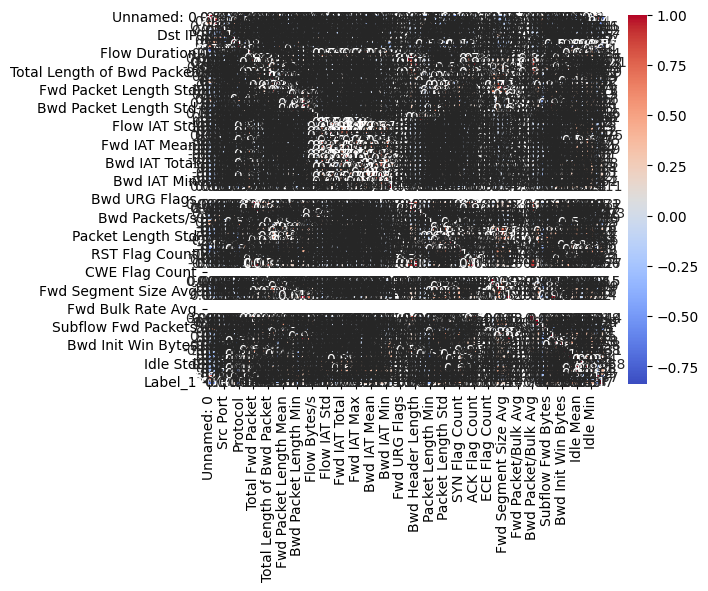

In [26]:
import seaborn as sns
sns.heatmap(data.corr(), annot =True, cmap='coolwarm')

In [27]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Construction du ShallowNeural Network

In [28]:
model = Sequential()

In [29]:
model.add(Dense(200, input_shape = (80, ), activation='relu'))
#Ajout de la couche de sortie
model.add(Dense(1, activation='sigmoid'))
#Compiler le model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
#Affichage
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │        16,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,401 (64.07 KB)

 Trainable params: 16,401 (64.07 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9041 - loss: 0.2717 - val_accuracy: 0.9687 - val_loss: 0.1178
Epoch 2/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9704 - loss: 0.1005 - val_accuracy: 0.9708 - val_loss: 0.0982
Epoch 3/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9722 - loss: 0.0917 - val_accuracy: 0.9711 - val_loss: 0.0937
Epoch 4/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9789 - loss: 0.0720 - val_accuracy: 0.9715 - val_loss: 0.1299
Epoch 5/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9770 - loss: 0.0751 - val_accuracy: 0.9719 - val_loss: 0.1115
Epoch 6/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9800 - loss: 0.0726 - val_accuracy: 0.9680 - val_loss: 0.1151
Epoch 7/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9781 - loss: 0.0699 - val_accuracy: 0.9777 - val_loss: 0.0785
Epoch 8/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9817 - loss: 0.0615 - val_accuracy: 0.

# 6. Utilisation de 5 algorithmes de machinbe learning

In [31]:
model_forest = RandomForestClassifier()

In [32]:
model_forest.fit(X_train, y_train)
y_pred = model_forest.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9952386225224228


In [33]:
model_SVC = SVC()

In [34]:
model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9497287122134869


In [35]:
model_Decision = DecisionTreeClassifier()

In [36]:
model_Decision.fit(X_train, y_train)
y_pred = model_Decision.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9980068652419444


In [37]:
model_neighbors = KNeighborsClassifier()

In [38]:
model_neighbors.fit(X_train, y_train)
y_pred = model_neighbors.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9633484663935333


In [39]:
model_logistic = LogisticRegression()

In [40]:
model_logistic.fit(X_train, y_train)
y_pred = model_logistic.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8865020484996124


# 7. Visualisation de  l’evolution de l’entrainement du réseau de neurone

In [41]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

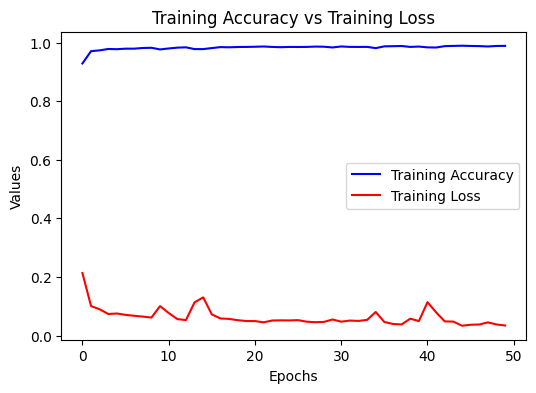

In [42]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training Accuracy vs Training Loss')
plt.legend()
plt.show()

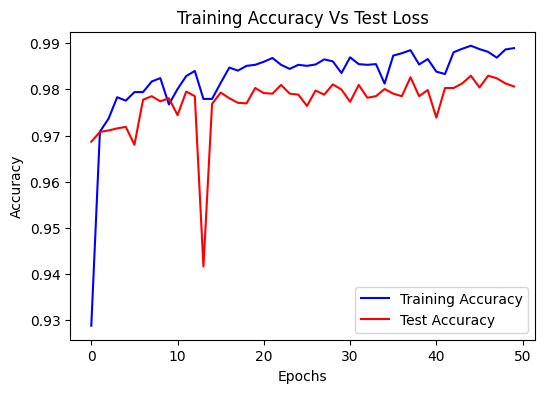

In [43]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Loss')
plt.legend()
plt.show()

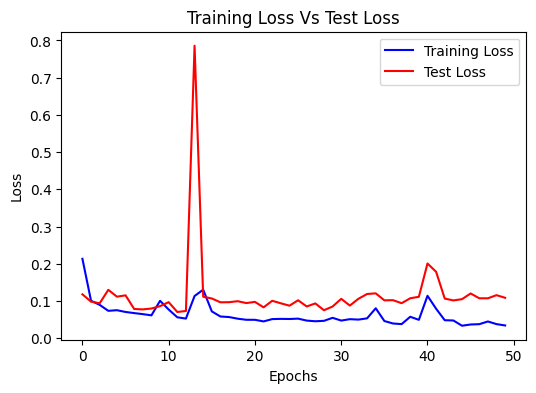

In [44]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss')
plt.legend()
plt.show()